<a href="https://colab.research.google.com/github/Miru-s/Sentiment-Analysis-/blob/main/fea_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from textblob import TextBlob, Word
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import csv
import pandas as pd

In [ ]:
with open('Amazon_Unlocked_Mobile.csv', 'r',encoding='utf-8') as f:
  reader = csv.reader(f)
  results = list(reader)

results = results[0]
results

['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes']

In [ ]:
col_list = ['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes']
df = pd. read_csv("Amazon_Unlocked_Mobile.csv", usecols=col_list)
result=(df['Reviews'].head(50))
result

0     I feel so LUCKY to have found this used (phone...
1     nice phone, nice up grade from my pantach revu...
2                                          Very pleased
3     It works good but it goes slow sometimes but i...
4     Great phone to replace my lost phone. The only...
5     I already had a phone with problems... I know ...
6     The charging port was loose. I got that solder...
7     Phone looks good but wouldn't stay charged, ha...
8     I originally was using the Samsung S2 Galaxy f...
9     It's battery life is great. It's very responsi...
10    My fiance had this phone previously, but cause...
11    This is a great product it came after two days...
12    These guys are the best! I had a little situat...
13    I'm really disappointed about my phone and ser...
14    Ordered this phone as a replacement for the sa...
15    Had this phone before and loved it but was not...
16    I was able to get the phone I previously owned...
17    I brought this phone as a replacement for 

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from string import punctuation
import re

def clean_sentence(sentence):
    sentence = re.sub(r"(?:\@|https?\://)\S+|\n+", "", sentence.lower())
    # Fix spelling errors in comments!
    sent = TextBlob(sentence)
    sent.correct()
    clean = ""
    for sentence in sent.sentences:    
        words = sentence.words
        # Remove punctuations
        words = [''.join(c for c in s if c not in punctuation) for s in words]
        words = [s for s in words if s]
        clean += " ".join(words)
        clean += ". "
    return clean

result = [clean_sentence(x) for x in result]
result

['i feel so lucky to have found this used phone to us not used hard at all phone on line from someone who upgraded and sold this one. my son liked his old one that finally fell apart after 25 years and did nt want an upgrade. thank you seller we really appreciate it your honesty re said used phonei recommend this seller very highly would but from them again. . ',
 'nice phone nice up grade from my pantach revue. very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung. ',
 'very pleased. ',
 'it works good but it goes slow sometimes but its a very good phone i love it. ',
 'great phone to replace my lost phone. the only thing is the volume up button does not work but i can still go into settings to adjust. other than that it does the job until i am eligible to upgrade my phone againthaanks. ',
 'i already had a phone with problems i know it stated it was used but dang it did not

In [ ]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
comments = TextBlob(' '.join(result))
comments.noun_phrases

WordList(['honesty re', 'nice phone', 'pantach revue', 'clean set', 'easy set', 'android phone', 'perfect size', 'social media', 'great phone samsung', 'good phone i', 'great phone', 'phone againthaanks', 'problems i', 'unhappy customer', 'new battery', 'purchase i', 'usable phone', 'nt stay', 'new battery', 'nt stay', 'longso i', 'samsung s2 galaxy', 'samsung epic 4g', 'keyboard i', 'compact size', 'basic functions', 'smart phone ie', 'directions text', 'cell phones', 'phone runs', 'i need', 'battery life lasts', 'galaxy s2', 's battery life', 'top button', 'browse amazon', 'replacement til', 'great product', 'i need', 'i m', 'i ve', 'i m', 'i m', 'i m', 'i m', 'i m', 'seller confirmation', 'sd card slot', 'file managment', 'trouble shoot', 'phone i', 'touch screen', 'service provider', 'cell phones', 'great purchase', 'phone work', 'i need', 'amazon s warehouse', 'micro sd card', 'nt use', 'prosbeautiful screen', 'good pictures', 'hands plays', 'good videos', 'gamesconsno bluetooth',

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
cleaned = list()
for phrase in comments.noun_phrases:
    count = 0
    for word in phrase.split():
        # Count the number of small words and words without an English definition
        if len(word) <= 2 or (not Word(word).definitions):
            count += 1
    # Only if the 'nonsensical' or short words DO NOT make up more than 40% (arbitrary) of the phrase add
    # it to the cleaned list, effectively pruning the ones not added.
    if count < len(phrase.split())*0.4:
        cleaned.append(phrase)
        
print("After compactness pruning:\nFeature Size:")
len(cleaned)

After compactness pruning:
Feature Size:


60

In [ ]:
for phrase in cleaned:    
    match = list()
    temp = list()
    word_match = list()
    for word in phrase.split():
        # Find common words among all phrases
        word_match = [p for p in cleaned if re.search(word, p) and p not in word_match]
        # If the size of matched phrases set is smaller than 30% of the cleaned phrases, 
        # then consider the phrase as non-redundant.
        if len(word_match) <= len(cleaned)*0.3 :
            temp.append(word)
            match += word_match
            
    phrase = ' '.join(temp)
#     print("Match for " + phrase + ": " + str(match))

    if len(match) >= len(cleaned)*0.1 :
        # Redundant feature set, since it contains more than 10% of the number of phrases. 
        # Prune all matched features.
        for feature in match:
            if feature in cleaned:
                cleaned.remove(feature)
            
        # Add largest length phrase as feature
        cleaned.append(max(match, key=len))
        

print("After redundancy pruning:\nFeature Size:" + str(len(cleaned)))
print("Cleaned features:")
cleaned

After redundancy pruning:
Feature Size:23
Cleaned features:


['clean set',
 'easy set',
 'social media',
 'unhappy customer',
 'compact size',
 'basic functions',
 'directions text',
 'top button',
 'browse amazon',
 'seller confirmation',
 'sd card slot',
 'trouble shoot',
 'service provider',
 'amazon s warehouse',
 'micro sd card',
 'hands plays',
 'late run',
 'temporary right',
 'fast ship',
 'bad charger port',
 'arabian keyboard',
 'perfect condition',
 'great screen resolution storage']

In [ ]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
feature_count = dict()
for phrase in cleaned:
    count = 0
    for word in phrase.split():
        if word not in stopwords.words('english'):
            count += comments.words.count(word)
    
    print(phrase + ": " + str(count))
    feature_count[phrase] = count

clean set: 5
easy set: 4
social media: 2
unhappy customer: 2
compact size: 3
basic functions: 2
directions text: 3
top button: 3
browse amazon: 4
seller confirmation: 8
sd card slot: 9
trouble shoot: 2
service provider: 5
amazon s warehouse: 4
micro sd card: 9
hands plays: 2
late run: 2
temporary right: 2
fast ship: 3
bad charger port: 4
arabian keyboard: 5
perfect condition: 7
great screen resolution storage: 28


In [ ]:
counts = list(feature_count.values())
features = list(feature_count.keys())
threshold = len(comments.noun_phrases)/100
#threshold=66

print("Threshold:" + str(threshold))

frequent_features = list()

for feature, count in feature_count.items():
    if count >= threshold:
        frequent_features.append(feature)
print(' Features:')
frequent_features=frequent_features[0:100]
frequent_features

Threshold:0.98
 Features:


['clean set',
 'easy set',
 'social media',
 'unhappy customer',
 'compact size',
 'basic functions',
 'directions text',
 'top button',
 'browse amazon',
 'seller confirmation',
 'sd card slot',
 'trouble shoot',
 'service provider',
 'amazon s warehouse',
 'micro sd card',
 'hands plays',
 'late run',
 'temporary right',
 'fast ship',
 'bad charger port',
 'arabian keyboard',
 'perfect condition',
 'great screen resolution storage']

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score
#b=dataset.values.T.tolist()
#print(b)
nltk_results = [nltk_sentiment(row) for row in frequent_features]
#print(nltk_results)
results_df = pd.DataFrame(nltk_results)
#print(results_df)
text_df = pd.DataFrame(frequent_features)
#print(text_df)
nltk_df = text_df.join(results_df)
#nltk_df1=nltk_df[[0,'neu']]
#print(nltk_df)
nltk_df.head(100)

,0,neg,neu,pos,compound
0,clean set,0.000,0.270,0.730,0.4019
1,easy set,0.000,0.256,0.744,0.4404
2,social media,0.000,1.000,0.000,0.0000
3,unhappy customer,0.737,0.263,0.000,-0.4215
4,compact size,0.000,1.000,0.000,0.0000
5,basic functions,0.000,1.000,0.000,0.0000
6,directions text,0.000,1.000,0.000,0.0000
7,top button,0.000,0.357,0.643,0.2023
8,browse amazon,0.000,0.370,0.630,0.1779
9,seller confirmation,0.000,1.000,0.000,0.0000


In [ ]:
newdf=nltk_df[0]
newdf=pd.DataFrame({'features':nltk_df[0],'pos':nltk_df['pos'],'neg':nltk_df['neg']})
newdf.pos=newdf.pos+0.2
newdf.neg=newdf.neg-0.2
newdf

,features,pos,neg
0,clean set,0.930,-0.200
1,easy set,0.944,-0.200
2,social media,0.200,-0.200
3,unhappy customer,0.200,0.537
4,compact size,0.200,-0.200
5,basic functions,0.200,-0.200
6,directions text,0.200,-0.200
7,top button,0.843,-0.200
8,browse amazon,0.830,-0.200
9,seller confirmation,0.200,-0.200


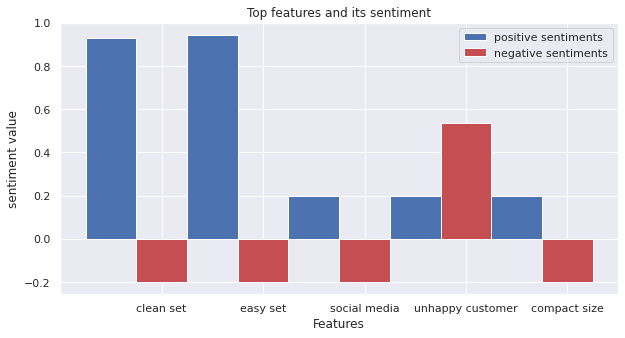

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
newdf


pos=newdf[0:5]['pos']
neg=newdf[0:5]['neg']

# data to plot
n_groups = 5
positive =newdf['pos'].head(5) 
negative =newdf['neg'].head(5)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.5
opacity = 1
 
rects1 = plt.bar(index, positive, bar_width,
alpha=opacity,
color='b',
label='positive sentiments')
 
rects2 = plt.bar(index + bar_width, negative, bar_width,
alpha=opacity,
color='r',
label='negative sentiments')
 
plt.xlabel('Features')
plt.ylabel('sentiment value')
plt.title('Top features and its sentiment')
plt.xticks(index + bar_width, newdf['features'].head(5))
plt.legend()
fig.set_size_inches(10, 5)
plt.show()

In [ ]:
absa_list = dict()
print(absa_list)
# For each frequent feature
for f in frequent_features:
    # For each comment
    absa_list[f] = list()
    for comment in result:
        blob = TextBlob(comment)
        # For each sentence of the comment
        for sentence in blob.sentences:
            # Search for frequent feature 'f'
            q = '|'.join(f.split())
            if re.search(r'\w*(' + str(q) + ')\w*', str(sentence)):
                absa_list[f].append(sentence)


print("\n\nAspect Specific sentences:  ")
absa_list

{}


Aspect Specific sentences:  


{'amazon s warehouse': [Sentence("i feel so lucky to have found this used phone to us not used hard at all phone on line from someone who upgraded and sold this one."),
  Sentence("my son liked his old one that finally fell apart after 25 years and did nt want an upgrade."),
  Sentence("thank you seller we really appreciate it your honesty re said used phonei recommend this seller very highly would but from them again."),
  Sentence("very clean set up and easy set up."),
  Sentence("never had an android phone but they are fantastic to say the least."),
  Sentence("perfect size for surfing and social media."),
  Sentence("great phone samsung."),
  Sentence("very pleased."),
  Sentence("it works good but it goes slow sometimes but its a very good phone i love it."),
  Sentence("great phone to replace my lost phone."),
  Sentence("the only thing is the volume up button does not work but i can still go into settings to adjust."),
  Sentence("other than that it does the job until i am eligi

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


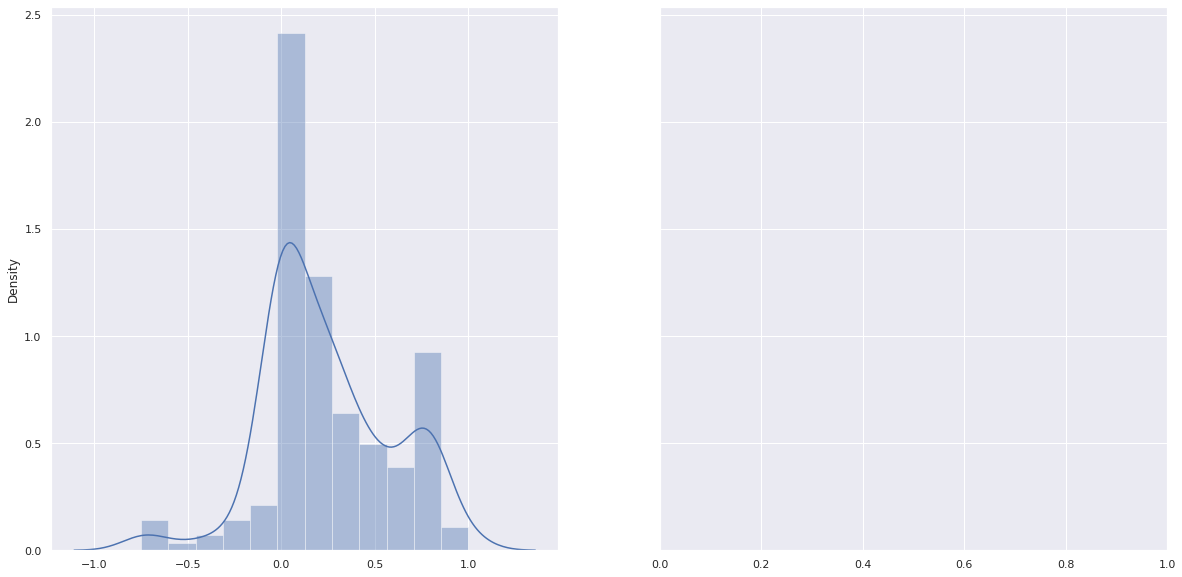

In [ ]:
scores = list()
absa_scores = dict()
for k, v in absa_list.items():
    absa_scores[k] = list()
    for sent in v:
        score = sent.sentiment.polarity
        scores.append(score)
        absa_scores[k].append(score)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 10))
plot1 = sns.distplot(scores, ax=ax1)



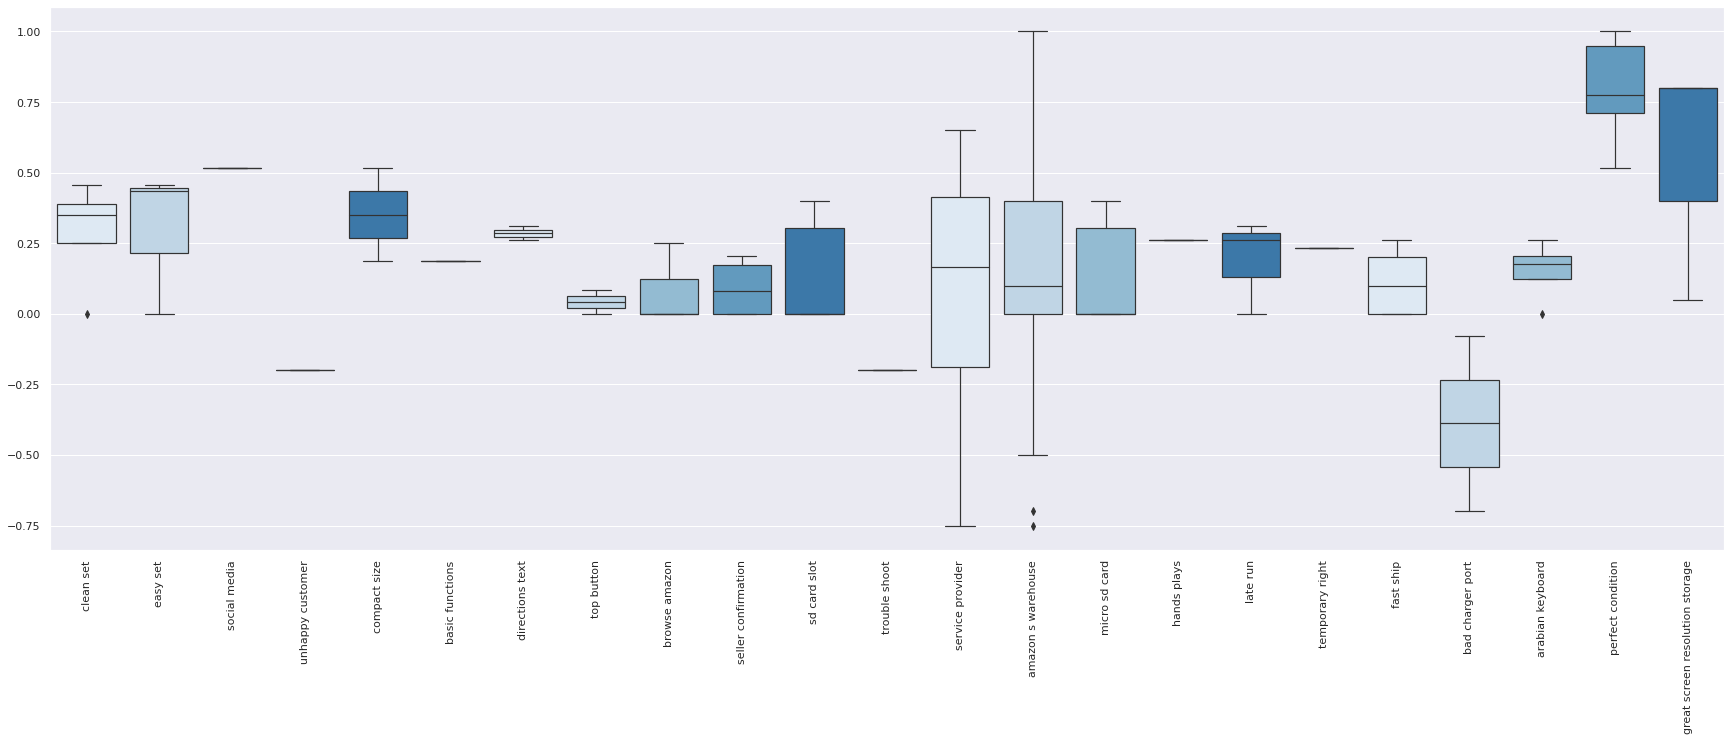

In [ ]:
vals = dict()
vals["aspects"] = list()
vals["scores"] = list()
for k, v in absa_scores.items():
    for score in v:
        vals["aspects"].append(k)
        vals["scores"].append(score)


fig, ax1 = plt.subplots(figsize=(30, 10))

color = sns.color_palette("Blues", 6)
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=3) 
sns.boxplot(x="aspects", y="scores", data=vals, palette=color, ax=ax1)

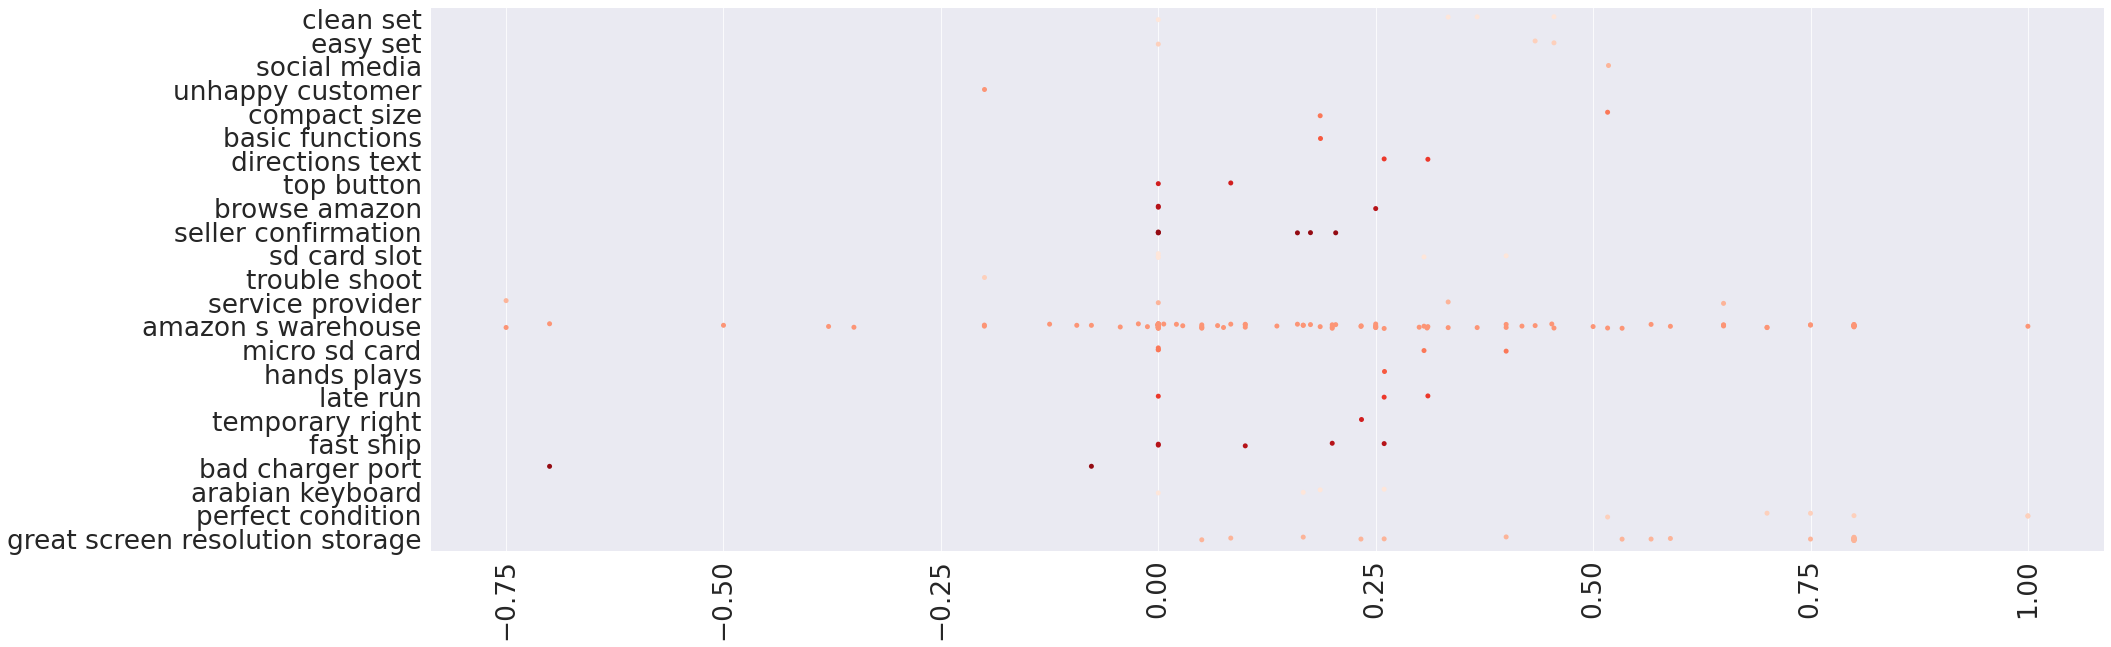

In [ ]:
color = sns.color_palette("Reds", 10)
fig, ax1 = plt.subplots(figsize=(30, 10))
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=5) 
sns.stripplot(y="aspects", x="scores",data=vals, palette=color)